# Hola este es un nuevo proyecto en el que trabajamos @Suzette23 y yo @DarthSaurus para nuestro diplomado de Ciencia de Datos con #Bedu

# Análisis de Dataset de Sequía en México

# Agregamos las Librerias

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 1.-  Cargar el DataSet: 
![DataSet Sequia en México por Municipios][def]


[def]: "C:\Users\darth\Sequia-en-Mexico-\venv_sequia_mexico\Lib\site-packages\MunicipiosSequia.csv"

In [5]:
ruta = "C:/Users/darth/Sequia-en-Mexico-/venv_sequia_mexico/Lib/site-packages/MunicipiosSequia.csv"
data = pd.read_csv(ruta)


C:\Users\darth\AppData\Local\Temp\ipykernel_72032\3399706020.py:2: DtypeWarning: Columns (100,101,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(ruta)


# Ahora utilizamos la triada de 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Columns: 371 entries, CVE_CONCATENADA to 31-Aug-23
dtypes: float64(2), int64(4), object(365)
memory usage: 7.0+ MB


In [7]:
data.head()

,CVE_CONCATENADA,CVE_ENT,CVE_MUN,NOMBRE_MUN,ENTIDAD,ORG_CUENCA,CLV_OC,CON_CUENCA,CVE_CONC,31-Jan-03,...,31-Mar-23,30-Apr-23,15-May-23,31-May-23,15-Jun-23,30-Jun-23,15-Jul-23,31-Jul-23,15-Aug-23,31-Aug-23
0,1001,1,1,Aguascalientes,Aguascalientes,Lerma Santiago Pacífico,VIII,Rio Santiago,16,NaN,...,D2,D2,D2,D2,D2,D3,D3,D3,D3,D3
1,1002,1,2,Asientos,Aguascalientes,Lerma Santiago Pacífico,VIII,Rio Santiago,16,NaN,...,D2,D2,D2,D2,D2,D2,D3,D3,D3,D3
2,1003,1,3,Calvillo,Aguascalientes,Lerma Santiago Pacífico,VIII,Rio Santiago,16,NaN,...,D1,D2,D2,D2,D2,D3,D3,D3,D3,D3
3,1004,1,4,Cosío,Aguascalientes,Lerma Santiago Pacífico,VIII,Rio Santiago,16,NaN,...,D2,D2,D2,D1,D2,D3,D2,D2,D2,D2
4,1005,1,5,Jesús María,Aguascalientes,Lerma Santiago Pacífico,VIII,Rio Santiago,16,NaN,...,D1,D2,D2,D2,D2,D3,D3,D3,D3,D3


In [8]:
data.describe()

,CVE_CONCATENADA,CVE_ENT,CVE_MUN,CVE_CONC,31-Aug-03,29-Feb-04
count,2471.000000,2471.000000,2471.000000,2471.000000,0.0,0.0
mean,19310.960340,19.202347,108.613112,15.492108,NaN,NaN
std,7394.532681,7.378841,132.284863,6.146445,NaN,NaN
min,1001.000000,1.000000,1.000000,1.000000,NaN,NaN
25%,14077.500000,14.000000,23.000000,11.000000,NaN,NaN
50%,20225.000000,20.000000,56.000000,15.000000,NaN,NaN
75%,24026.500000,24.000000,127.500000,21.000000,NaN,NaN
max,32058.000000,32.000000,570.000000,26.000000,NaN,NaN


# Limpieza de datos

## Indentificamos los valores Faltantes:

In [9]:
data.isnull().sum()


CVE_CONCATENADA      0
CVE_ENT              0
CVE_MUN              0
NOMBRE_MUN           0
ENTIDAD              0
                  ... 
30-Jun-23          518
15-Jul-23          434
31-Jul-23          194
15-Aug-23          321
31-Aug-23          327
Length: 371, dtype: int64

### Eliminar columnas con todos los valores NaN

In [11]:
data_cleaned = data.dropna(axis=1, how='all')


### Verificar cuántas columnas se han eliminado

In [13]:
columns_removed = data.shape[1] - data_cleaned.shape[1]

### Mostrar las primeras filas del dataset limpiado y el número de columnas eliminadas

In [14]:
data_cleaned.head(), columns_removed

(   CVE_CONCATENADA  CVE_ENT  CVE_MUN      NOMBRE_MUN         ENTIDAD  \
 0             1001        1        1  Aguascalientes  Aguascalientes   
 1             1002        1        2        Asientos  Aguascalientes   
 2             1003        1        3        Calvillo  Aguascalientes   
 3             1004        1        4           Cosío  Aguascalientes   
 4             1005        1        5     Jesús María  Aguascalientes   
 
                 ORG_CUENCA CLV_OC    CON_CUENCA  CVE_CONC 31-Jan-03  ...  \
 0  Lerma Santiago Pacífico   VIII  Rio Santiago        16       NaN  ...   
 1  Lerma Santiago Pacífico   VIII  Rio Santiago        16       NaN  ...   
 2  Lerma Santiago Pacífico   VIII  Rio Santiago        16       NaN  ...   
 3  Lerma Santiago Pacífico   VIII  Rio Santiago        16       NaN  ...   
 4  Lerma Santiago Pacífico   VIII  Rio Santiago        16       NaN  ...   
 
   31-Mar-23 30-Apr-23 15-May-23 31-May-23 15-Jun-23 30-Jun-23 15-Jul-23  \
 0        D2        

## Identificar columnas que deberían ser numéricas pero se detectaron como object debido a caracteres no numéricos.

In [25]:
object_columns = data_cleaned.select_dtypes(include=['object']).columns

### Crear un diccionario para almacenar valores únicos no numéricos en cada columna

In [16]:
non_numeric_values = {}

### Iterar sobre las columnas de tipo object para identificar valores no numéricos

In [18]:
for col in object_columns:
    # Intentar convertir la columna a float, si falla, almacenar el valor no numérico
    try:
        data_cleaned[col].astype(float)
    except ValueError as e:
        non_numeric_value = str(e).split(":")[-1].strip().replace("'", "")
        non_numeric_values[col] = non_numeric_value

non_numeric_values

{'NOMBRE_MUN': 'Aguascalientes',
 'ENTIDAD': 'Aguascalientes',
 'ORG_CUENCA': 'Lerma Santiago Pacífico',
 'CLV_OC': 'VIII',
 'CON_CUENCA': 'Rio Santiago',
 '31-Jan-03': 'D2',
 '28-Feb-03': 'D2',
 '31-Mar-03': 'D1',
 '30-Apr-03': 'D1',
 '31-May-03': 'D1',
 '30-Jun-03': 'D1',
 '31-Jul-03': 'D1',
 '30-Sep-03': 'D0',
 '31-Oct-03': 'D0',
 '30-Nov-03': 'D0',
 '31-Dec-03': 'D0',
 '31-Jan-04': 'D0',
 '31-Mar-04': 'D0',
 '30-Apr-04': 'D0',
 '31-May-04': 'D0',
 '30-Jun-04': 'D0',
 '31-Jul-04': 'D0',
 '31-Aug-04': 'D0',
 '30-Sep-04': 'D0',
 '31-Oct-04': 'D0',
 '30-Nov-04': 'D0',
 '31-Dec-04': 'D0',
 '31-Jan-05': 'D0',
 '28-Feb-05': 'D1',
 '31-Mar-05': 'D0',
 '30-Apr-05': 'D0',
 '31-May-05': 'D0',
 '30-Jun-05': 'D0',
 '31-Jul-05': 'D0',
 '31-Aug-05': 'D0',
 '30-Sep-05': 'D0',
 '31-Oct-05': 'D0',
 '30-Nov-05': 'D0',
 '31-Dec-05': 'D0',
 '31-Jan-06': 'D0',
 '28-Feb-06': 'D1',
 '31-Mar-06': 'D2',
 '30-Apr-06': 'D2',
 '31-May-06': 'D1',
 '30-Jun-06': 'D2',
 '31-Jul-06': 'D0',
 '31-Aug-06': 'D0',
 '30-

In [19]:
dict(list(non_numeric_values.items())[:10])  # muestra solo los primeros 10 elementos


{'NOMBRE_MUN': 'Aguascalientes',
 'ENTIDAD': 'Aguascalientes',
 'ORG_CUENCA': 'Lerma Santiago Pacífico',
 'CLV_OC': 'VIII',
 'CON_CUENCA': 'Rio Santiago',
 '31-Jan-03': 'D2',
 '28-Feb-03': 'D2',
 '31-Mar-03': 'D1',
 '30-Apr-03': 'D1',
 '31-May-03': 'D1'}

## Creando un DataFrame a partir del diccionario non_numeric_values

In [23]:
non_numeric_df = pd.DataFrame(list(non_numeric_values.items()), columns=['Column', 'Non-Numeric Value'])

non_numeric_df

,Column,Non-Numeric Value
0,NOMBRE_MUN,Aguascalientes
1,ENTIDAD,Aguascalientes
2,ORG_CUENCA,Lerma Santiago Pacífico
3,CLV_OC,VIII
4,CON_CUENCA,Rio Santiago
...,...,...
360,30-Jun-23,D3
361,15-Jul-23,D3
362,31-Jul-23,D3
363,15-Aug-23,D3


## Identificando las columnas de tipo object

In [27]:
object_columns = data_cleaned.select_dtypes(include=['object']).columns

### Reiniciando el diccionario

In [28]:
non_numeric_values = {}

In [29]:
# Iterando sobre las columnas identificadas como 'object'
for column in object_columns:
    # Obteniendo valores únicos no numéricos para la columna
    non_numeric = data_cleaned[column][~data_cleaned[column].astype(str).str.isnumeric()].unique()
    if len(non_numeric) > 0:
        non_numeric_values[column] = list(non_numeric)

### Creando un DataFrame a partir del diccionario non_numeric_values

In [31]:
non_numeric_df_adjusted = pd.DataFrame([(key, val) for key, values in non_numeric_values.items() for val in values], 
                                       columns=['Column', 'Non-Numeric Value'])

non_numeric_df_adjusted

,Column,Non-Numeric Value
0,NOMBRE_MUN,Aguascalientes
1,NOMBRE_MUN,Asientos
2,NOMBRE_MUN,Calvillo
3,NOMBRE_MUN,Cosío
4,NOMBRE_MUN,Jesús María
...,...,...
4222,31-Aug-23,D3
4223,31-Aug-23,D2
4224,31-Aug-23,NaN
4225,31-Aug-23,D0


## Manejo de Valores Atipicos

####  Comenzaremos con un análisis general para identificar valores atípicos en el dataset. Dado que el dataset contiene principalmente datos categóricos (los niveles de sequía), nos centraremos en las columnas numéricas, si las hay:

In [20]:
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

numeric_columns

Index(['CVE_CONCATENADA', 'CVE_ENT', 'CVE_MUN', 'CVE_CONC'], dtype='object')

### De estas columnas, las primeras cuatro parecen ser códigos y no serían adecuadas para la identificación de valores atípicos en el sentido tradicional

## Concatenando todos los valores de sequía en el dataset

In [32]:
drought_data = data_cleaned[data_cleaned.columns[10:]].stack().reset_index()
drought_data.columns = ['Index', 'Date', 'Drought Level']

## Filtrando registros que corresponden a los niveles D3 y D4

In [33]:
extreme_drought_data = drought_data[drought_data['Drought Level'].isin(['D3', 'D4'])]

## Contando la frecuencia de D3 y D4 para cada municipio


In [34]:
drought_counts = extreme_drought_data.groupby('Index').size().reset_index(name='Count')
drought_counts = drought_counts.sort_values(by='Count', ascending=False)


## Agregando los nombres de los municipios al dataframe

In [35]:
drought_counts = pd.merge(drought_counts, data_cleaned[['NOMBRE_MUN', 'ENTIDAD']], left_on='Index', right_index=True)

# Mostrando los primeros 10 municipios más afectados

In [36]:
top_municipios = drought_counts.head(10)
top_municipios

,Index,Count,NOMBRE_MUN,ENTIDAD
14,14,76,Tijuana,Baja California
15,15,68,Playas de Rosarito,Baja California
47,49,58,Jiménez,Coahuila de Zaragoza
1138,2018,58,Nuevo Laredo,Tamaulipas
58,60,57,Piedras Negras,Coahuila de Zaragoza
1024,1904,56,Agua Prieta,Sonora
45,47,55,Guerrero,Coahuila de Zaragoza
35,37,54,Acuña,Coahuila de Zaragoza
1125,2005,53,Guerrero,Tamaulipas
209,259,53,Ojinaga,Chihuahua


# Visualizar los Municipios mas afectados con Seaborn

### Configurando el tamaño del gráfico

In [37]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

# Creando un gráfico de barras con Seaborn

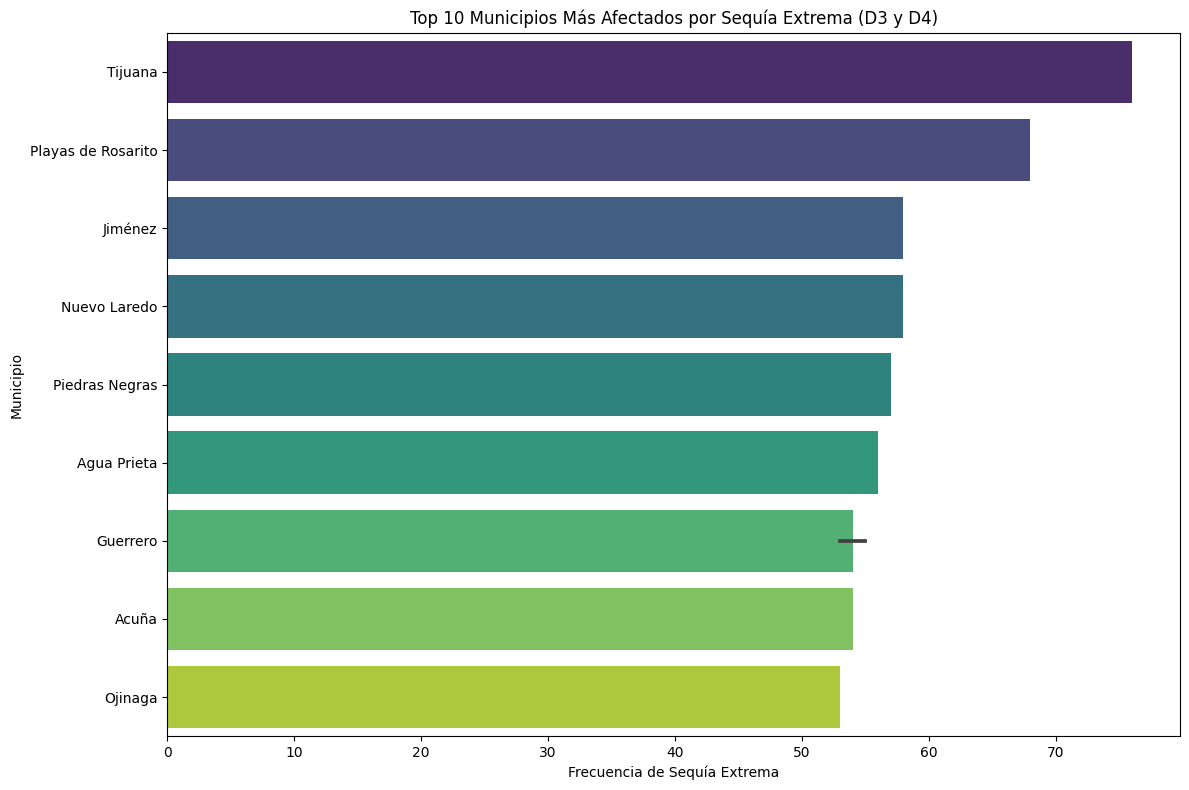

In [44]:
# Configurando el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Creando un gráfico de barras con Seaborn
sns.barplot(x='Count', y='NOMBRE_MUN', data=top_municipios, palette='viridis')

# Configurando el título y las etiquetas del gráfico
plt.title('Top 10 Municipios Más Afectados por Sequía Extrema (D3 y D4)')
plt.xlabel('Frecuencia de Sequía Extrema')
plt.ylabel('Municipio')

plt.tight_layout()
plt.show()

In [45]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install -r requirements.txt


In [50]:
git add Proyecto Bedu.ipynb
git commit -m "Agregando mi Jupyter Notebook"
git push origin main


SyntaxError: invalid syntax (1859277030.py, line 1)